# Import the libararies

In [12]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime

In [13]:
# import dataset
dataset = pd.read_csv("international-airline-passengers.csv")

In [14]:
dataset

,Month,Thousands of passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [15]:
# Actual format required - YYYY-MM-DD but data is given only in format YYYY-MM
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
dataset.isna().sum()

Month                      0
Thousands of passengers    0
dtype: int64

In [17]:
dataset['Month'].dtype

dtype('<M8[ns]')

In [18]:
# We have to make time variable to index
dataset.set_index('Month',inplace = True)
dataset.head()

,Thousands of passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

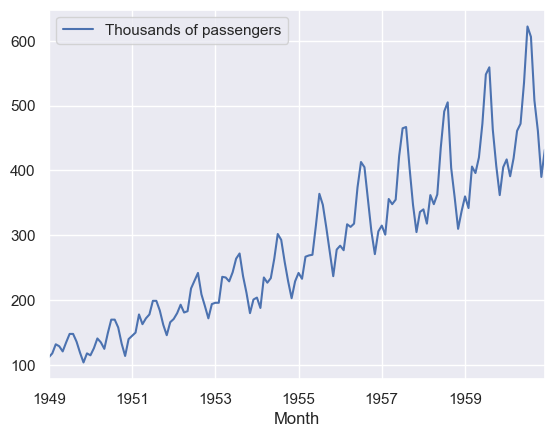

In [19]:
dataset.plot()

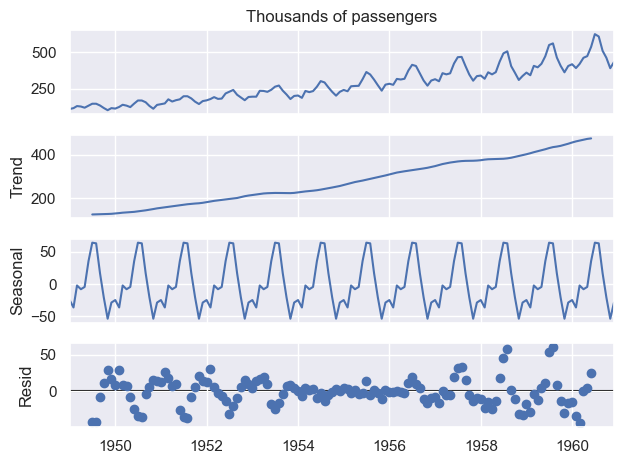

In [20]:
# Decompose the dataset to check what all component we have

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of passengers'], period = 12)
decomposition.plot()
plt.show()

In [21]:
dataset.isna().sum()

Thousands of passengers    0
dtype: int64

In [22]:
# We do have upward trend and seasonality in our dataset
# Now we have to check whether data is stationary or non-stationary
# We can perform time series forecasting only when data is stationary

# Augmented Decay Fuller test - To check wether data is Stationary or not

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(dataset['Thousands of passengers'])

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [25]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented decay fuller test - Stationary or Non-Stationary")
    labels = ['ADF Fuller test' , 'p -value', '#Lags', 'No.of Obs']

    for i, j in zip(result,labels):
        print(j + " " + str(i))
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak evidence against null hypothesis and my time series is non Stationary")

In [26]:
adf_check(dataset['Thousands of passengers'])

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test 0.8153688792060482
p -value 0.991880243437641
#Lags 13
No.of Obs 130
Weak evidence against null hypothesis and my time series is non Stationary


### Since my data is non stationary,we have to use lag method to make sure data would be in a stationary format
### How you make your time series data stationary - Lag methods (Trend - go one step ahead. Seasonality - go 12 step ahead)

In [27]:
dataset['1st Difference'] = dataset['Thousands of passengers'] - dataset['Thousands of passengers'].shift(1)

In [28]:
dataset.head(10)

,Thousands of passengers,1st Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [29]:
adf_check(dataset['1st Difference'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -2.8292668241699994
p -value 0.0542132902838255
#Lags 12
No.of Obs 130
Weak evidence against null hypothesis and my time series is non Stationary


In [30]:
dataset['2nd Difference'] = dataset['1st Difference'] - dataset['1st Difference'].shift(1)

In [31]:
dataset.head()

,Thousands of passengers,1st Difference,2nd Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [32]:
adf_check(dataset['2nd Difference'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -16.384231542468505
p -value 2.7328918500142407e-29
#Lags 11
No.of Obs 130
Strong evidence against null hypothesis and my time series is Stationary


In [33]:
# seasonality
dataset['seasonality'] =  dataset['Thousands of passengers'] - dataset['Thousands of passengers'].shift(12)

In [34]:
dataset.head(20)

,Thousands of passengers,1st Difference,2nd Difference,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [35]:
adf_check(dataset['seasonality'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -3.383020726492481
p -value 0.011551493085514954
#Lags 1
No.of Obs 130
Strong evidence against null hypothesis and my time series is Stationary


#### Trend - pdq
#### Seasonality - PQD
#### p or P - partial auto correlation(Auto Regressive method)
#### q or Q - Auto correlation(Moving average)
#### d or D - difference (integrated method) - lag function
#### d - difference - 2(Trend)
#### D - difference - 1(Seasonality)

In [36]:
# Find p/q and P/Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
# finding q (trend)

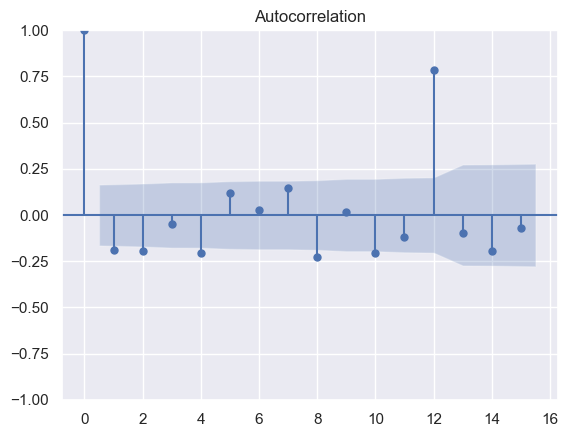

In [38]:
plot_acf(dataset['2nd Difference'].dropna(),lags = 15)
plt.show()

In [39]:
# Find Q (Seasonality) - 5

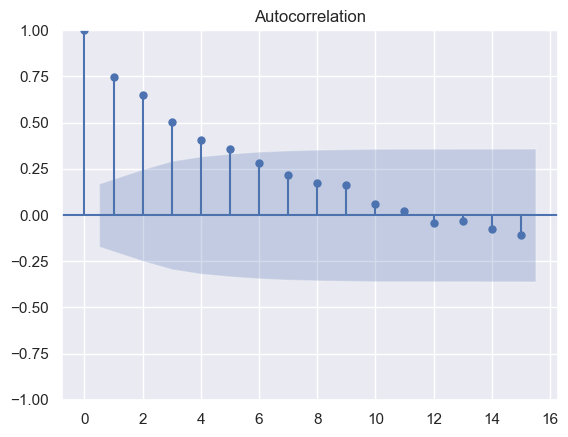

In [40]:
plot_acf(dataset['seasonality'].dropna(),lags = 15)
plt.show()

In [41]:
# p - trend - 4

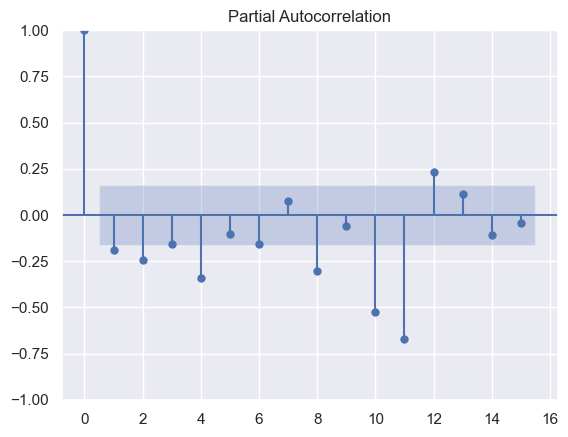

In [42]:
plot_pacf(dataset['2nd Difference'].dropna(),lags = 15)
plt.show()

In [43]:
# P - Seasonality - 2

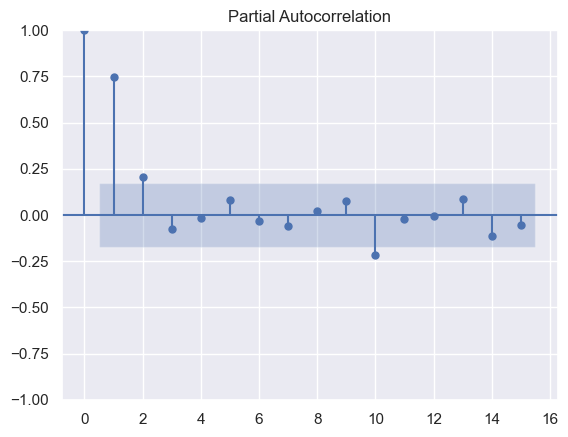

In [44]:
plot_pacf(dataset['seasonality'].dropna(),lags = 15)
plt.show()

In [45]:
# p - 4
# d - 2
# q - 2
# P - 2
# D - 1
# Q - 5

# Building time series forecasting model basis parameters values

In [46]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [55]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of passengers'],
                                  order = (4,2,2) , seasonal_order = (2,1,1,12))

In [49]:
!pip install statsmodels

In [56]:
result = model.fit()

In [57]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:              Thousands of passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.784
Date:                              Sun, 18 Jan 2026   AIC                           1015.567
Time:                                      22:26:29   BIC                           1044.242
Sample:                                  01-01-1949   HQIC                          1027.219
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3595      0.097    -14.043      0.000      -1.549      -1.170
ar.L2         -0.49